In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from collections import defaultdict

df19 = pd.read_csv('./nov19pub.csv')
df21 = pd.read_csv('./nov21pub.csv')

In [136]:
df19['HRHHID']

0            110157414767
1           4005751110574
2            110824593052
3         147240092351000
4         901002967110858
               ...       
138845     10005815764346
138846     50610634581470
138847    965683190700009
138848     75016847506821
138849    211868005750476
Name: HRHHID, Length: 138850, dtype: int64

In [137]:
len(set(df19['HRHHID'].astype(str) + df19['HRHHID2'].astype(str)))

70281

In [138]:
# Check if there are duplicates in the concatenation of columns "HRHHID" and "HRHHID2" in both datasets
print(len(set(df19['HRHHID'].astype(str) + df19['HRHHID2'].astype(str))), len(df19))
print(len(set(df21['HRHHID'].astype(str) + df21['HRHHID2'].astype(str))), len(df21))
# print unique values of column "HRMONTH"
print(df19['HRMONTH'].unique())
print(df21['HRMONTH'].unique())

70281 138850
68264 127375
[11]
[11]


In [37]:
#filter dataframes for HRINTSTA == 1

df19_HRINTSTA = df19[(df19['HRINTSTA']==1)]
df21_HRINTSTA = df21[(df21['HRINTSTA']==1)]

In [44]:
df19_HRINTSTA['HEDESKTP'].unique()

array([ 1,  2, -1])

In [18]:
# print the name of the column with all unique values
print(df19.columns[df19.nunique() == len(df19)])

Index([], dtype='object')


In [144]:
#find fraction of users who use a desktop computer
print("2019:", (df19_HRINTSTA['HEDESKTP']==1).sum() / len(df19_HRINTSTA))
print("2021:", (df21_HRINTSTA['HEDESKTP']==1).sum() / len(df21_HRINTSTA))

2019: 0.39340542096750974
2021: 0.4064425414742269


In [145]:
#find fraction of users who use a desktop computer HERE FRACTION IS TAKEN OVER THE ENTIRE POPULATION,
                                                # WHICH INCLUDES NON INTERVIEW PEROPLE
print("2019:", (df19['HEDESKTP']==1).sum() / len(df19))
print("2021:", (df21['HEDESKTP']==1).sum() / len(df21))

2019: 0.33460568959308606
2021: 0.3267909715407262


In [46]:
#find fraction of users who use a laptop
print("2019:", (df19_HRINTSTA['HELAPTOP']==1).sum() / len(df19_HRINTSTA))
print("2021:", (df21_HRINTSTA['HELAPTOP']==1).sum() / len(df21_HRINTSTA))

2019: 0.6227338543739468
2021: 0.6503861814418092


In [48]:
#find fraction of users who use a tablet/e-reader
print("2019:", (df19_HRINTSTA['HETABLET']==1).sum() / len(df19_HRINTSTA))
print("2021:", (df21_HRINTSTA['HETABLET']==1).sum() / len(df21_HRINTSTA))

2019: 0.44819936154178347
2021: 0.45229609522228625


In [51]:
#find fraction of users who use a phone
print("2019:", (df19_HRINTSTA['HEMPHONE']==1).sum() / len(df19_HRINTSTA))
print("2021:", (df21_HRINTSTA['HEMPHONE']==1).sum() / len(df21_HRINTSTA))

2019: 0.8015444930861919
2021: 0.8176793961704081


In [147]:
# find fraction of phone internet users
print("2019:", (df19["HEMPHONE"]==1).sum() / len(df19))
print("2021:", (df21["HEMPHONE"]==1).sum() / len(df21))

2019: 0.6817428880086425
2021: 0.6574367026496565


There is some issue with the data - there are duplicates 

In [6]:
# get all rows for a random HHID
print(df19[df19['HRHHID']==df19['HRHHID'].unique()[4]])

df19[df19['HRHHID']==df19['HRHHID'].unique()[0]]["HEDESKTP"]

                HRHHID  HRMONTH  HRYEAR4  HURESPLI  HUFINAL  HULANGCODE  \
4      901002967110858       11     2019         1      201           0   
18258  901002967110858       11     2019         2      201           0   
18259  901002967110858       11     2019         2      201           0   

       HETENURE  HEHOUSUT  HETELHHD  HETELAVL  ...  HENOTV5  HENOTV6  HENOTV7  \
4             1         1         1        -1  ...       -1       -1       -1   
18258         1         1         1        -1  ...        2        2        2   
18259         1         1         1        -1  ...        2        2        2   

       HENOTV8  HENOTV9  HENOTV10  HENOTV11  HENOTV12  PUELGFLG  PWPRMWGT  
4           -1       -1        -1        -1        -1        20  37130922  
18258        2        2         2         2         2        -1         0  
18259        2        2         2         2         2        20  25279503  

[3 rows x 508 columns]


0        1
70451   -1
Name: HEDESKTP, dtype: int64

As we see, there are rows with -1s, and multiple rows can have the same HRHHID, with different answers

In [43]:
(df19['HRHHID'].value_counts() == 1).sum()

20448

HRHHID
931654012010526    16
910100164872448    16
10115354572522     16
196022370405551    16
140002070027134    15
                   ..
20008695103996      1
965683290001009     1
166890902090503     1
299035060018609     1
50610634581470      1
Name: count, Length: 55107, dtype: int64


<Axes: >

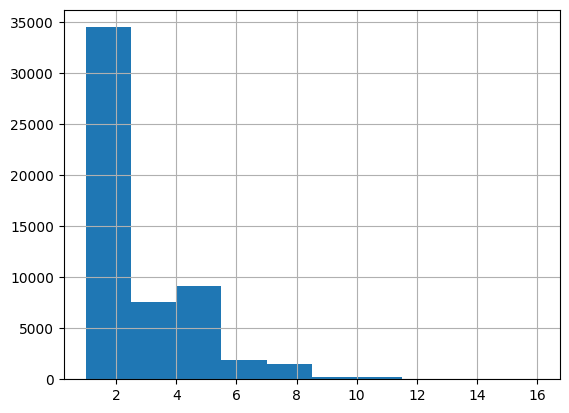

In [139]:
# Print the number of rows for each unique value of column "HRHHID"
print(df19['HRHHID'].value_counts())

# Plot the distribution of the number of rows per unique value of column "HRHHID"
df19['HRHHID'].value_counts().hist()

In [140]:
household_id_to_internet = defaultdict(list)

def calculate_attribute_fraction(df, attribute, value, ignore_values=[]):
    """
    Calculate the fraction of the unique values of the "HRHHID" column that have the attribute "attribute" with value "value"
    Note that we need to take the mode of the attribute value for each unique value of the "groupby" column

    # Ignore the values in the "attribute" column that are in the list "ignore_values" (e.g. -1)
    """

    household_id_to_attribute = defaultdict(list)
    for household_id, attribute_value in zip(df['HRHHID'], df[attribute]):
        household_id_to_attribute[household_id].append(attribute_value)

    # remove the values in the "attribute" column that are in the list "ignore_values" (e.g. -1)
    for household_id, attribute_values in household_id_to_attribute.items():
        household_id_to_attribute[household_id] = [value for value in attribute_values if value not in ignore_values]

    # TODO: Do something better for the case where there are no values left in the list after removing the values in "ignore_values"
    # for now, just remove the key from the dictionary
    household_id_to_attribute = {household_id: attribute_values for household_id, attribute_values in household_id_to_attribute.items() if len(attribute_values) > 0}

    # replace the lists with the mode of the list
    '''for household_id, attribute_values in household_id_to_attribute.items():
        household_id_to_attribute[household_id] = max(set(attribute_values), key=attribute_values.count)'''

    # calculate the fraction of the unique values of the "HRHHID" column that have the attribute "attribute" with value "value"
    return sum([1 for household_id, attribute_value in household_id_to_attribute.items() if attribute_value == value]) / len(household_id_to_attribute)

print(calculate_attribute_fraction(df19, "HEMPHONE", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEMPHONE", 1, ignore_values=[-1]))


0.0
0.0


In [134]:
print(calculate_attribute_fraction(df19, "HEDESKTP", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEDESKTP", 1, ignore_values=[-1]))

0.0
0.0


In [10]:
print(calculate_attribute_fraction(df19, "HEINWORK", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEINWORK", 1, ignore_values=[-1]))

0.6911297312915342
0.6735398978204139


In [11]:
print(calculate_attribute_fraction(df19, "HEINSCHL", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEINSCHL", 1, ignore_values=[-1]))

0.22083721374501517
0.21524603747360543


In [12]:
print(calculate_attribute_fraction(df19, "PESOCIAL", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "PESOCIAL", 1, ignore_values=[-1]))

0.7396202213980984
0.7419535056953971


In [58]:
#filter dataframes for PRPERTYP == 2 (Adult civilian household member)

df19_PRPERTYP2 = df19[(df19['PRPERTYP']==2)]
df21_PRPERTYP2 = df21[(df21['PRPERTYP']==2)]

In [73]:
#find fraction of people employed (other than disabled/retired/other?)
print("2019:", (df19_PRPERTYP2['PEMLR'].isin([1,2])).sum() / len(df19_PRPERTYP2))
print("2021:", (df21_PRPERTYP2['PEMLR'].isin([1,2])).sum() / len(df21_PRPERTYP2))

2019: 0.5912078161915668
2021: 0.5744840035151889


In [75]:
df19_PRPERTYP2['PRUNTYPE'].unique()  #also has -1

array([-1,  6,  5,  3,  4,  2,  1])

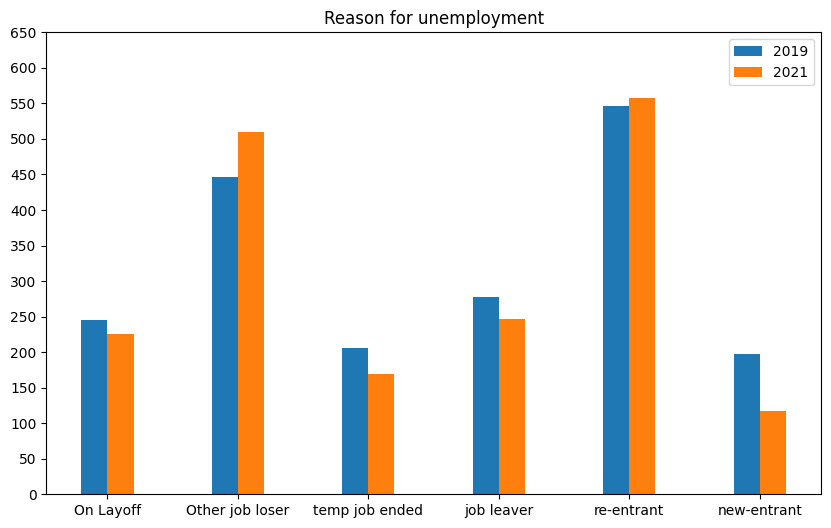

In [184]:
# Reason for unemployment
plt.figure(figsize=(10,6))
X = ['On Layoff', 'Other job loser', 'temp job ended', 'job leaver', 're-entrant', 'new-entrant'] 

labels19, counts19 = np.unique(df19_PRPERTYP2[df19_PRPERTYP2['PRUNTYPE']!=-1]['PRUNTYPE'], return_counts=True)
labels21, counts21 = np.unique(df21_PRPERTYP2[df21_PRPERTYP2['PRUNTYPE']!=-1]['PRUNTYPE'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=50))
plt.legend()
plt.title('Reason for unemployment')
       
plt.show()

In [159]:
# Average of total hours worked per week considering all jobs that a person does

print('Average work hours in 2021: ',df21[df21['PEHRACTT']!=-1]['PEHRACTT'].mean())
print('Average work hours in 2019: ',df19[df19['PEHRACTT']!=-1]['PEHRACTT'].mean())

Average work hours in 2021:  38.42255744980476
Average work hours in 2019:  39.09026149523008


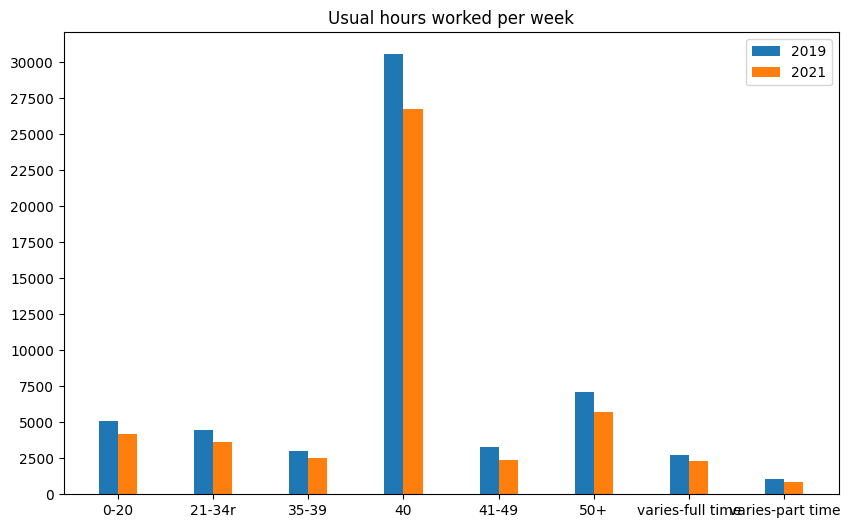

In [186]:
# Usual hours worked per week
plt.figure(figsize=(10,6))
X = ['0-20', '21-34r', '35-39', '40', '41-49', '50+', 'varies-full time', 'varies-part time'] 

labels19, counts19 = np.unique(df19[df19['PRHRUSL']!=-1]['PRHRUSL'], return_counts=True)
labels21, counts21 = np.unique(df21[df21['PRHRUSL']!=-1]['PRHRUSL'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=2500))
plt.legend()
plt.title('Usual hours worked per week')

       
plt.show()

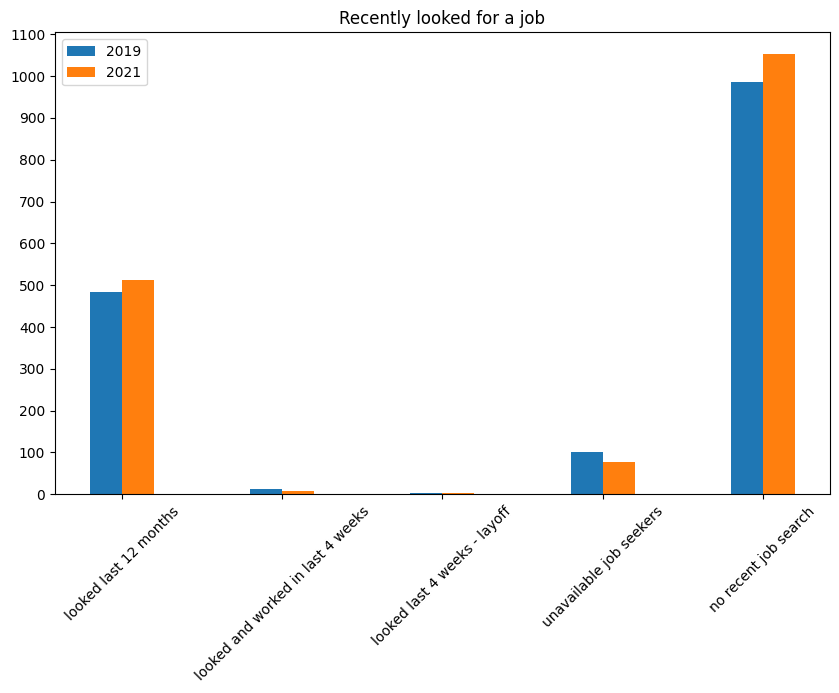

In [174]:
# Recently looking for a job
plt.figure(figsize=(10,6))
X = ['looked last 12 months', 'looked and worked in last 4 weeks', 'looked last 4 weeks - layoff', 'unavailable job seekers', 'no recent job search'] 

labels19, counts19 = np.unique(df19[df19['PRJOBSEA']!=-1]['PRJOBSEA'], return_counts=True)
labels21, counts21 = np.unique(df21[df21['PRJOBSEA']!=-1]['PRJOBSEA'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=100))
plt.legend()
plt.title("Recently looked for a job")
       
plt.show()

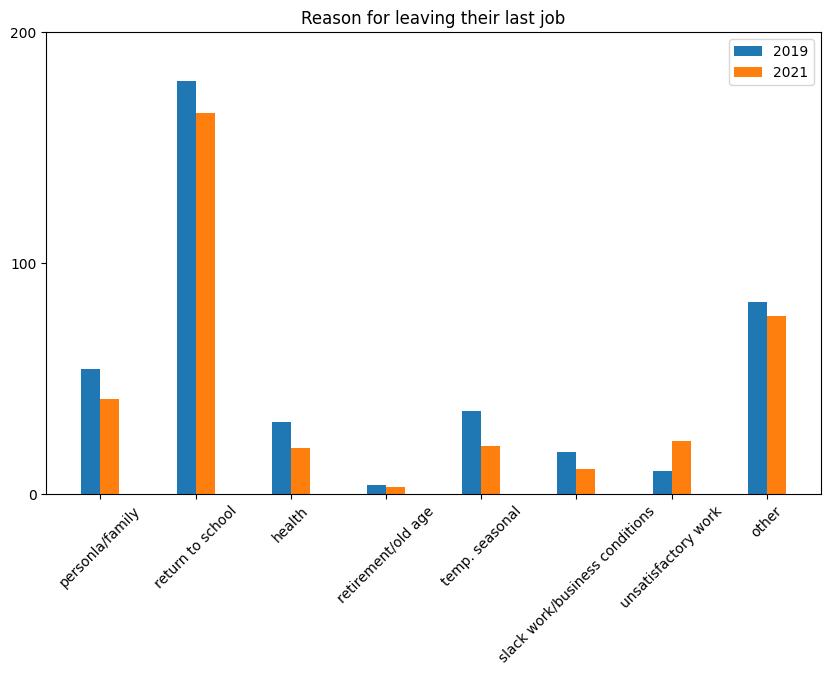

In [176]:
# Reason for leaving their last job
plt.figure(figsize=(10,6))
X = ['personla/family', 'return to school', 'health', 'retirement/old age', 'temp. seasonal', 'slack work/business conditions', 'unsatisfactory work','other'] 

labels19, counts19 = np.unique(df19[df19['PEJHRSN']!=-1]['PEJHRSN'], return_counts=True)
labels21, counts21 = np.unique(df21[df21['PEJHRSN']!=-1]['PEJHRSN'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=100))
plt.legend()
plt.title("Reason for leaving their last job")
       
plt.show()

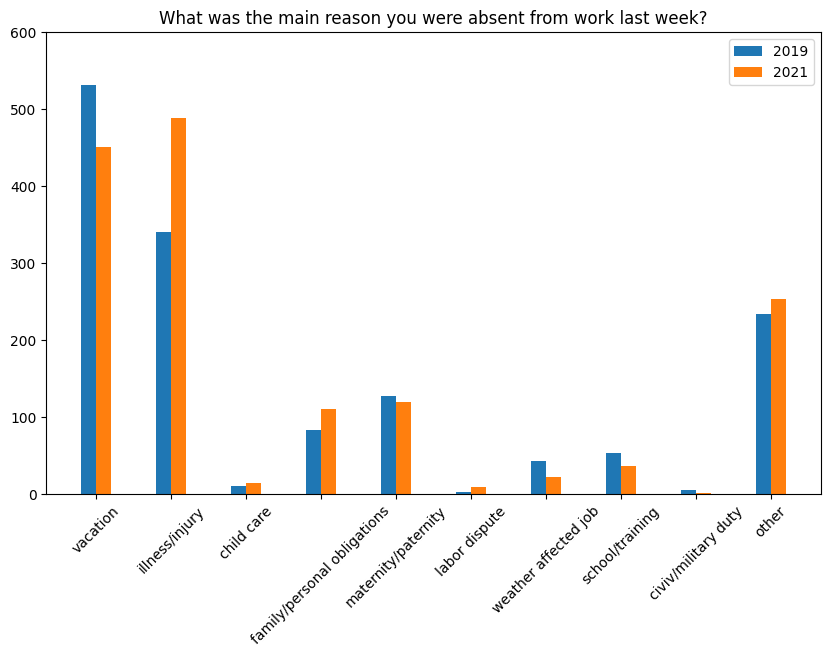

In [191]:
#WHAT IS THE MAIN REASON YOU WERE ABSENT FROM WORK LAST WEEK
plt.figure(figsize=(10,6))

#These values are not in both 19 and 21 data :
# 'on layoff', 'business conditions', 'waiting for a new job', 'does not work in the business'
X = ['vacation','illness/injury', 'child care', \
    'family/personal obligations', 'maternity/paternity', 'labor dispute', 'weather affected job','school/training', \
    'civiv/military duty', 'other'] 

labels19, counts19 = np.unique(df19[df19['PEABSRSN']!=-1]['PEABSRSN'], return_counts=True)
labels21, counts21 = np.unique(df21[df21['PEABSRSN']!=-1]['PEABSRSN'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=100))
plt.legend()
plt.title("What was the main reason you were absent from work last week?")
       
plt.show()

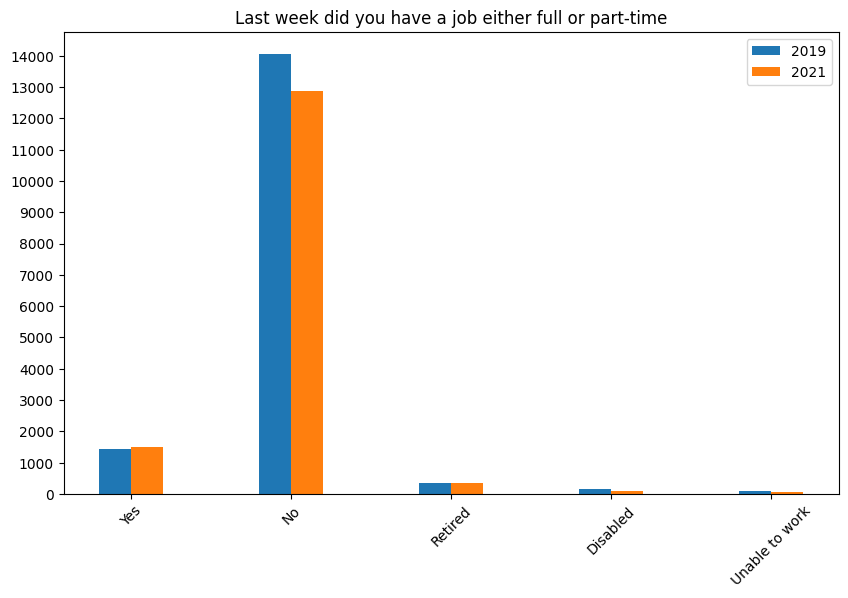

In [196]:


#Last week did you have a job either full or part-time
plt.figure(figsize=(10,6))


X = ['Yes', 'No', 'Retired', 'Disabled', 'Unable to work'] 

labels19, counts19 = np.unique(df19[df19['PUABSOT']>0]['PUABSOT'], return_counts=True)
labels21, counts21 = np.unique(df21[df21['PUABSOT']>0]['PUABSOT'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=1000))
plt.legend()
plt.title("Last week did you have a job either full or part-time")
       
plt.show()

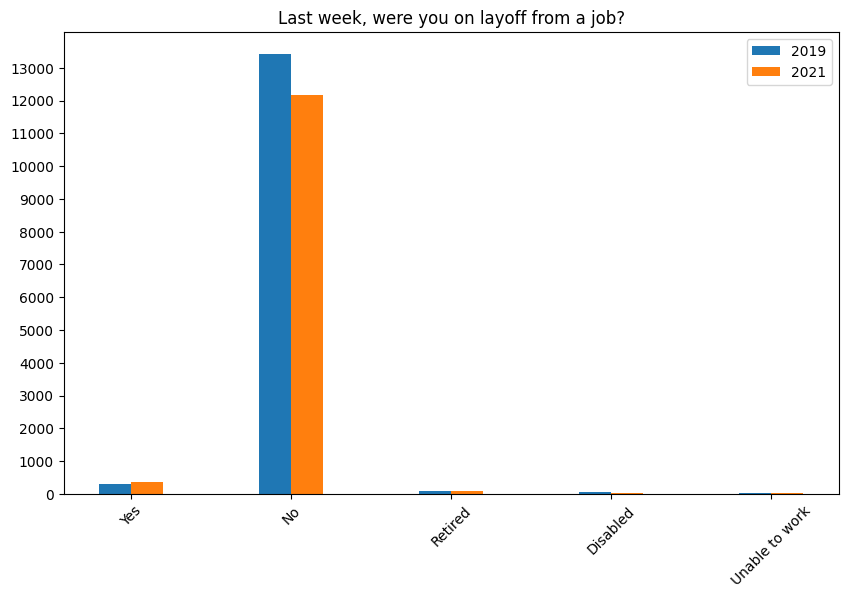

In [198]:


#Last week, were you on layoff from a job?
plt.figure(figsize=(10,6))


X = ['Yes', 'No', 'Retired', 'Disabled', 'Unable to work'] 

labels19, counts19 = np.unique(df19[df19['PULAY']>0]['PULAY'], return_counts=True)
labels21, counts21 = np.unique(df21[df21['PULAY']>0]['PULAY'], return_counts=True)

assert(set(labels19) == set(labels21))
X_axis = np.arange(len(labels19))


plt.bar(X_axis - 0.1, counts19, width=0.2, align='center', label='2019')
plt.bar(X_axis + 0.1, counts21, width=0.2, align='center', label='2021')
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(max(counts19),max(counts21))+100, step=1000))
plt.legend()
plt.title("Last week, were you on layoff from a job?")
       
plt.show()